In [1]:
# Import pandas
import pandas as pd
import numpy as np

# Load dataset
cc_apps = pd.read_csv("../../data/ScatterPlot/crx.csv", header = None)

# Inspect data
cc_apps.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [2]:
# Print summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print("\n")

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 no

# Handling the missing values

In [3]:
# Import numpy
import numpy as np

# Inspect missing values in the dataset
print(cc_apps.tail(17))

# Replace the '?'s with NaN
cc_apps = cc_apps.replace(to_replace ='?', value = np.NaN)

    0      1       2  3  4   5   6      7  8  9   10 11 12   13   14 15
673  ?   29.5   2.000  y  p   e   h  2.000  f  f   0  f  g  256   17  -
674  a  37.33   2.500  u  g   i   h  0.210  f  f   0  f  g  260  246  -
675  a  41.58   1.040  u  g  aa   v  0.665  f  f   0  f  g  240  237  -
676  a  30.58  10.665  u  g   q   h  0.085  f  t  12  t  g  129    3  -
677  b  19.42   7.250  u  g   m   v  0.040  f  t   1  f  g  100    1  -
678  a  17.92  10.210  u  g  ff  ff  0.000  f  f   0  f  g    0   50  -
679  a  20.08   1.250  u  g   c   v  0.000  f  f   0  f  g    0    0  -
680  b   19.5   0.290  u  g   k   v  0.290  f  f   0  f  g  280  364  -
681  b  27.83   1.000  y  p   d   h  3.000  f  f   0  f  g  176  537  -
682  b  17.08   3.290  u  g   i   v  0.335  f  f   0  t  g  140    2  -
683  b  36.42   0.750  y  p   d   v  0.585  f  f   0  f  g  240    3  -
684  b  40.58   3.290  u  g   m   v  3.500  f  f   0  t  s  400    0  -
685  b  21.08  10.085  y  p   e   h  1.250  f  f   0  f  g  260 

In [4]:
# Impute the missing values with mean imputation
cc_apps.fillna(cc_apps.mean(numeric_only=True), inplace=True)

# Iterate over each column of cc_apps
for col in cc_apps:
    # Check if the column is of object type
    if cc_apps[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(pd.isnull(cc_apps).sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64


In [5]:
cc_apps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


# Preprocessing the data

1. Convert the non-numeric data into numeric.
2. Split the data into train and test sets.
3. Scale the feature values to a uniform range.

In [6]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in cc_apps:
    # Compare if the dtype is object
    if cc_apps[col].dtypes =='object':
    # Use LabelEncoder to do the numeric transformation
        cc_apps[col]=le.fit_transform(cc_apps[col])

In [7]:
cc_apps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,156,0.000,2,1,13,8,1.25,1,1,1,0,0,42,0,0
1,0,328,4.460,2,1,11,4,3.04,1,1,6,0,0,118,560,0
2,0,89,0.500,2,1,11,4,1.50,1,0,0,0,0,74,824,0
3,1,125,1.540,2,1,13,8,3.75,1,1,5,1,0,1,3,0
4,1,43,5.625,2,1,13,8,1.71,1,0,0,0,2,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,52,10.085,3,3,5,4,1.25,0,0,0,0,0,67,0,1
686,0,71,0.750,2,1,2,8,2.00,0,1,2,1,0,40,394,1
687,0,97,13.500,3,3,6,3,2.00,0,1,1,1,0,40,1,1
688,1,20,0.205,2,1,0,8,0.04,0,0,0,0,0,74,750,1


# Splitting the dataset into train and test sets

In [8]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13 and convert the DataFrame to a NumPy array
cc_apps = cc_apps.drop([11, 13], axis=1)
cc_apps = cc_apps.values

# Segregate features and labels into separate variables
X,y = cc_apps[:,0:13] , cc_apps[:,13]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

# Fitting a logistic regression model to the train set

In [9]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)

LogisticRegression()

# Making predictions and evaluating performance

In [10]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test, y_pred)

Accuracy of logistic regression classifier:  0.8377192982456141


array([[92, 11],
       [26, 99]], dtype=int64)

In [11]:
y_pred

array([1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1.

# Finding the best performing model

In [12]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.850725 using {'max_iter': 100, 'tol': 0.01}


In [14]:
!pip install seaborn

     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
     ------- ----------------------------- 61.4/294.9 kB 544.7 kB/s eta 0:00:01
     ------------------- ------------------ 153.6/294.9 kB 1.0 MB/s eta 0:00:01
     ------------------------------------ - 286.7/294.9 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 1.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:title={'center':'t-SNE'}, xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

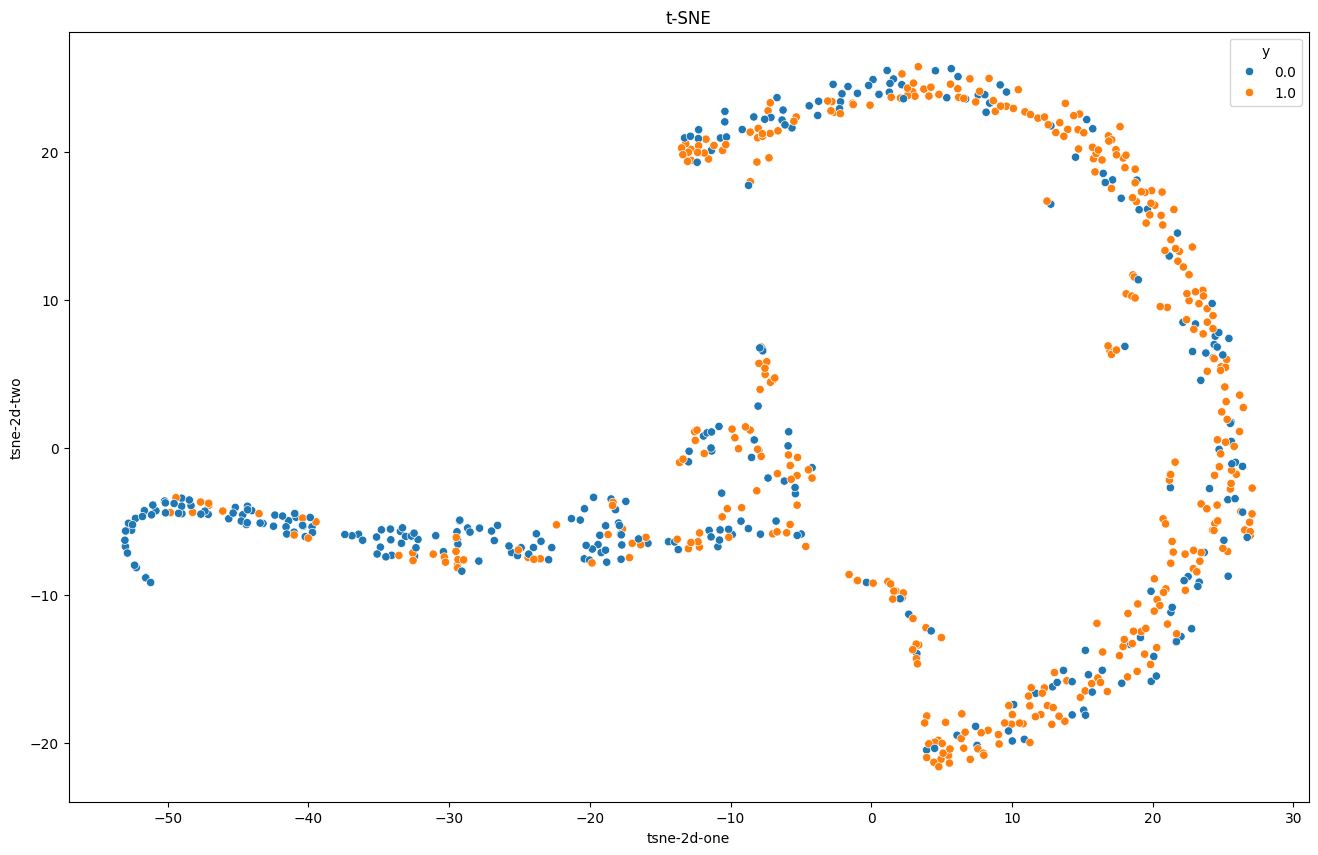

In [15]:
from sklearn.manifold import TSNE
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(X)
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = projections[:,0]
df_subset['tsne-2d-two'] = projections[:,1]
df_subset['y'] = y

plt.figure(figsize=(16,10))
plt.title('t-SNE')
sns.scatterplot(
    x='tsne-2d-one' , y='tsne-2d-two',
    hue="y",
    data=df_subset
)


In [16]:
df_subset.to_csv("../../data/ScatterPlot/tsne_results.csv")